# Project1: Probably Interesting Data

## Distribution estimation
1. Set up a new git repository in your GitHub account
2. Pick two datasets from https://www.kaggle.com/uciml/datasets
3. Choose a programming language (Python, C/C++, Java)
4. Formulate ideas on how machine learning can be used to model distributions within the dataset
5. Build a heuristic and/or algorithm to model the data using mixture models of probability distributions programmatically
6. Document your process and results
7. Commit your source code, documentation and other supporting files to the git repository in GitHub



## Step 1: Set-up Environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Step 2: Implement Expectation-Maximization model
- Let us start with expectation part
- here we use the observed data to estimate the values of the missing data.
- in simple terms we update our variables

In [2]:
def expectation(data, parameters,attributeA,attributeB):
    for i in range(data.shape[0]):
        x = data[attributeA][i]
        y = data[attributeB][i]
        probability_cluster1=probability([x,y],list(parameters['mu1']), list(parameters['sigma1']), parameters['lambda'][0])
        probability_cluster2=probability([x,y],list(parameters['mu2']), list(parameters['sigma2']), parameters['lambda'][1])
        probability_cluster3=probability([x,y],list(parameters['mu3']), list(parameters['sigma3']),parameters['lambda'][2])
        if(probability_cluster1>=probability_cluster2)&(probability_cluster1>= probability_cluster3):
            data['predictions'][i] =0
        elif(probability_cluster2>=probability_cluster1)&(probability_cluster2>= probability_cluster3):
            data['predictions'][i] = 1
        elif(probability_cluster3>=probability_cluster1)&(probability_cluster3>= probability_cluster2):
            data['predictions'][i]=2
        else:data['predictions'][i]=np.random.choice(3, len(data))        
    return data

- Let us now implement the maximization part
- we try to optimize our parameters in this step

In [3]:
def maximization(data, parameters, attributeA, attributeB): 
    datapoints_cluster1=data[data['predictions']==1]
    datapoints_cluster2=data[data['predictions']==2]
    datapoints_cluster3=data[data['predictions']==3]
    percentage_cluster1=len(datapoints_cluster1)/float(len(data))
    percentage_cluster2=len(datapoints_cluster2)/float(len(data))
    percentage_cluster3=1-percentage_cluster1-percentage_cluster2    
    parameters['lambda']=[percentage_cluster1,percentage_cluster2,percentage_cluster3 ]
    parameters['mu1']=[datapoints_cluster1[attributeA].mean(),datapoints_cluster1[attributeB].mean(), None]
    parameters['mu2']=[datapoints_cluster2[attributeA].mean(),datapoints_cluster2[attributeB].mean(), None]
    parameters['mu3']=[datapoints_cluster3[attributeA].mean(),datapoints_cluster3[attributeB].mean(), None]    
    parameters['sigma1']= [[datapoints_cluster1[attributeA].std(),0], [0,datapoints_cluster1[attributeB].std()], None]
    parameters['sigma2']= [[datapoints_cluster2[attributeA].std(),0], [0,datapoints_cluster2[attributeB].std()], None]
    parameters['sigma3']= [[datapoints_cluster3[attributeA].std(),0], [0,datapoints_cluster3[attributeB].std()], None]
    return parameters

- We need to find distance using distance method and probabilities using the probability method.
- These methods are accessed by E-M methods.

In [4]:
def distance(old, new):
    dist = 0
    for parameter in ['mu1','mu2','mu3']:
        for i in range(len(old)):
            dist+=(old[parameter][i]-new[parameter][i])**2
    return dist**0.5
def probability(value, mu, sigmama, lambdaValue):
    prob=lambdaValue
    for i in range(len(value)):
        prob*=norm.pdf(value[i],mu[i],sigmama[i][i])
    return prob

## Step 3a: Import the first dataset
- for this project we will be using two datasets- wine quality dataset and iris data set
- first let us import wine quality dataset

In [5]:
data= pd.read_csv("../data/winequality-red.csv")

data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Step 4a: Prepare data for modelling
- Let us have a closer look at the dataset itself to prepare for  modelling

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- we can see that our target attribute `quality` ranges from 3 to 8
- we can modify this into quality bad(less than or equal to 4), average(greater than 4 and less than 7) and good(greater than or equal to 7)
- hereby representing quality-bad as 0, quality-average as 1 and quality-good as 2

In [7]:
attributeibutes = {3:0,4:0,5:1,6:1,7:2,8:2}
data['quality'] = data['quality'].map(attributeibutes)
df=data.copy()
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
292,10.4,0.550,0.23,2.7,0.091,18.0,48.0,0.99940,3.22,0.64,10.3,1
981,9.5,0.860,0.26,1.9,0.079,13.0,28.0,0.99712,3.25,0.62,10.0,1
176,7.3,0.380,0.21,2.0,0.080,7.0,35.0,0.99610,3.33,0.47,9.5,1
378,11.4,0.625,0.66,6.2,0.088,6.0,24.0,0.99880,3.11,0.99,13.3,1
302,8.3,0.705,0.12,2.6,0.092,12.0,28.0,0.99940,3.51,0.72,10.0,1


- Let us look at how data is distributed

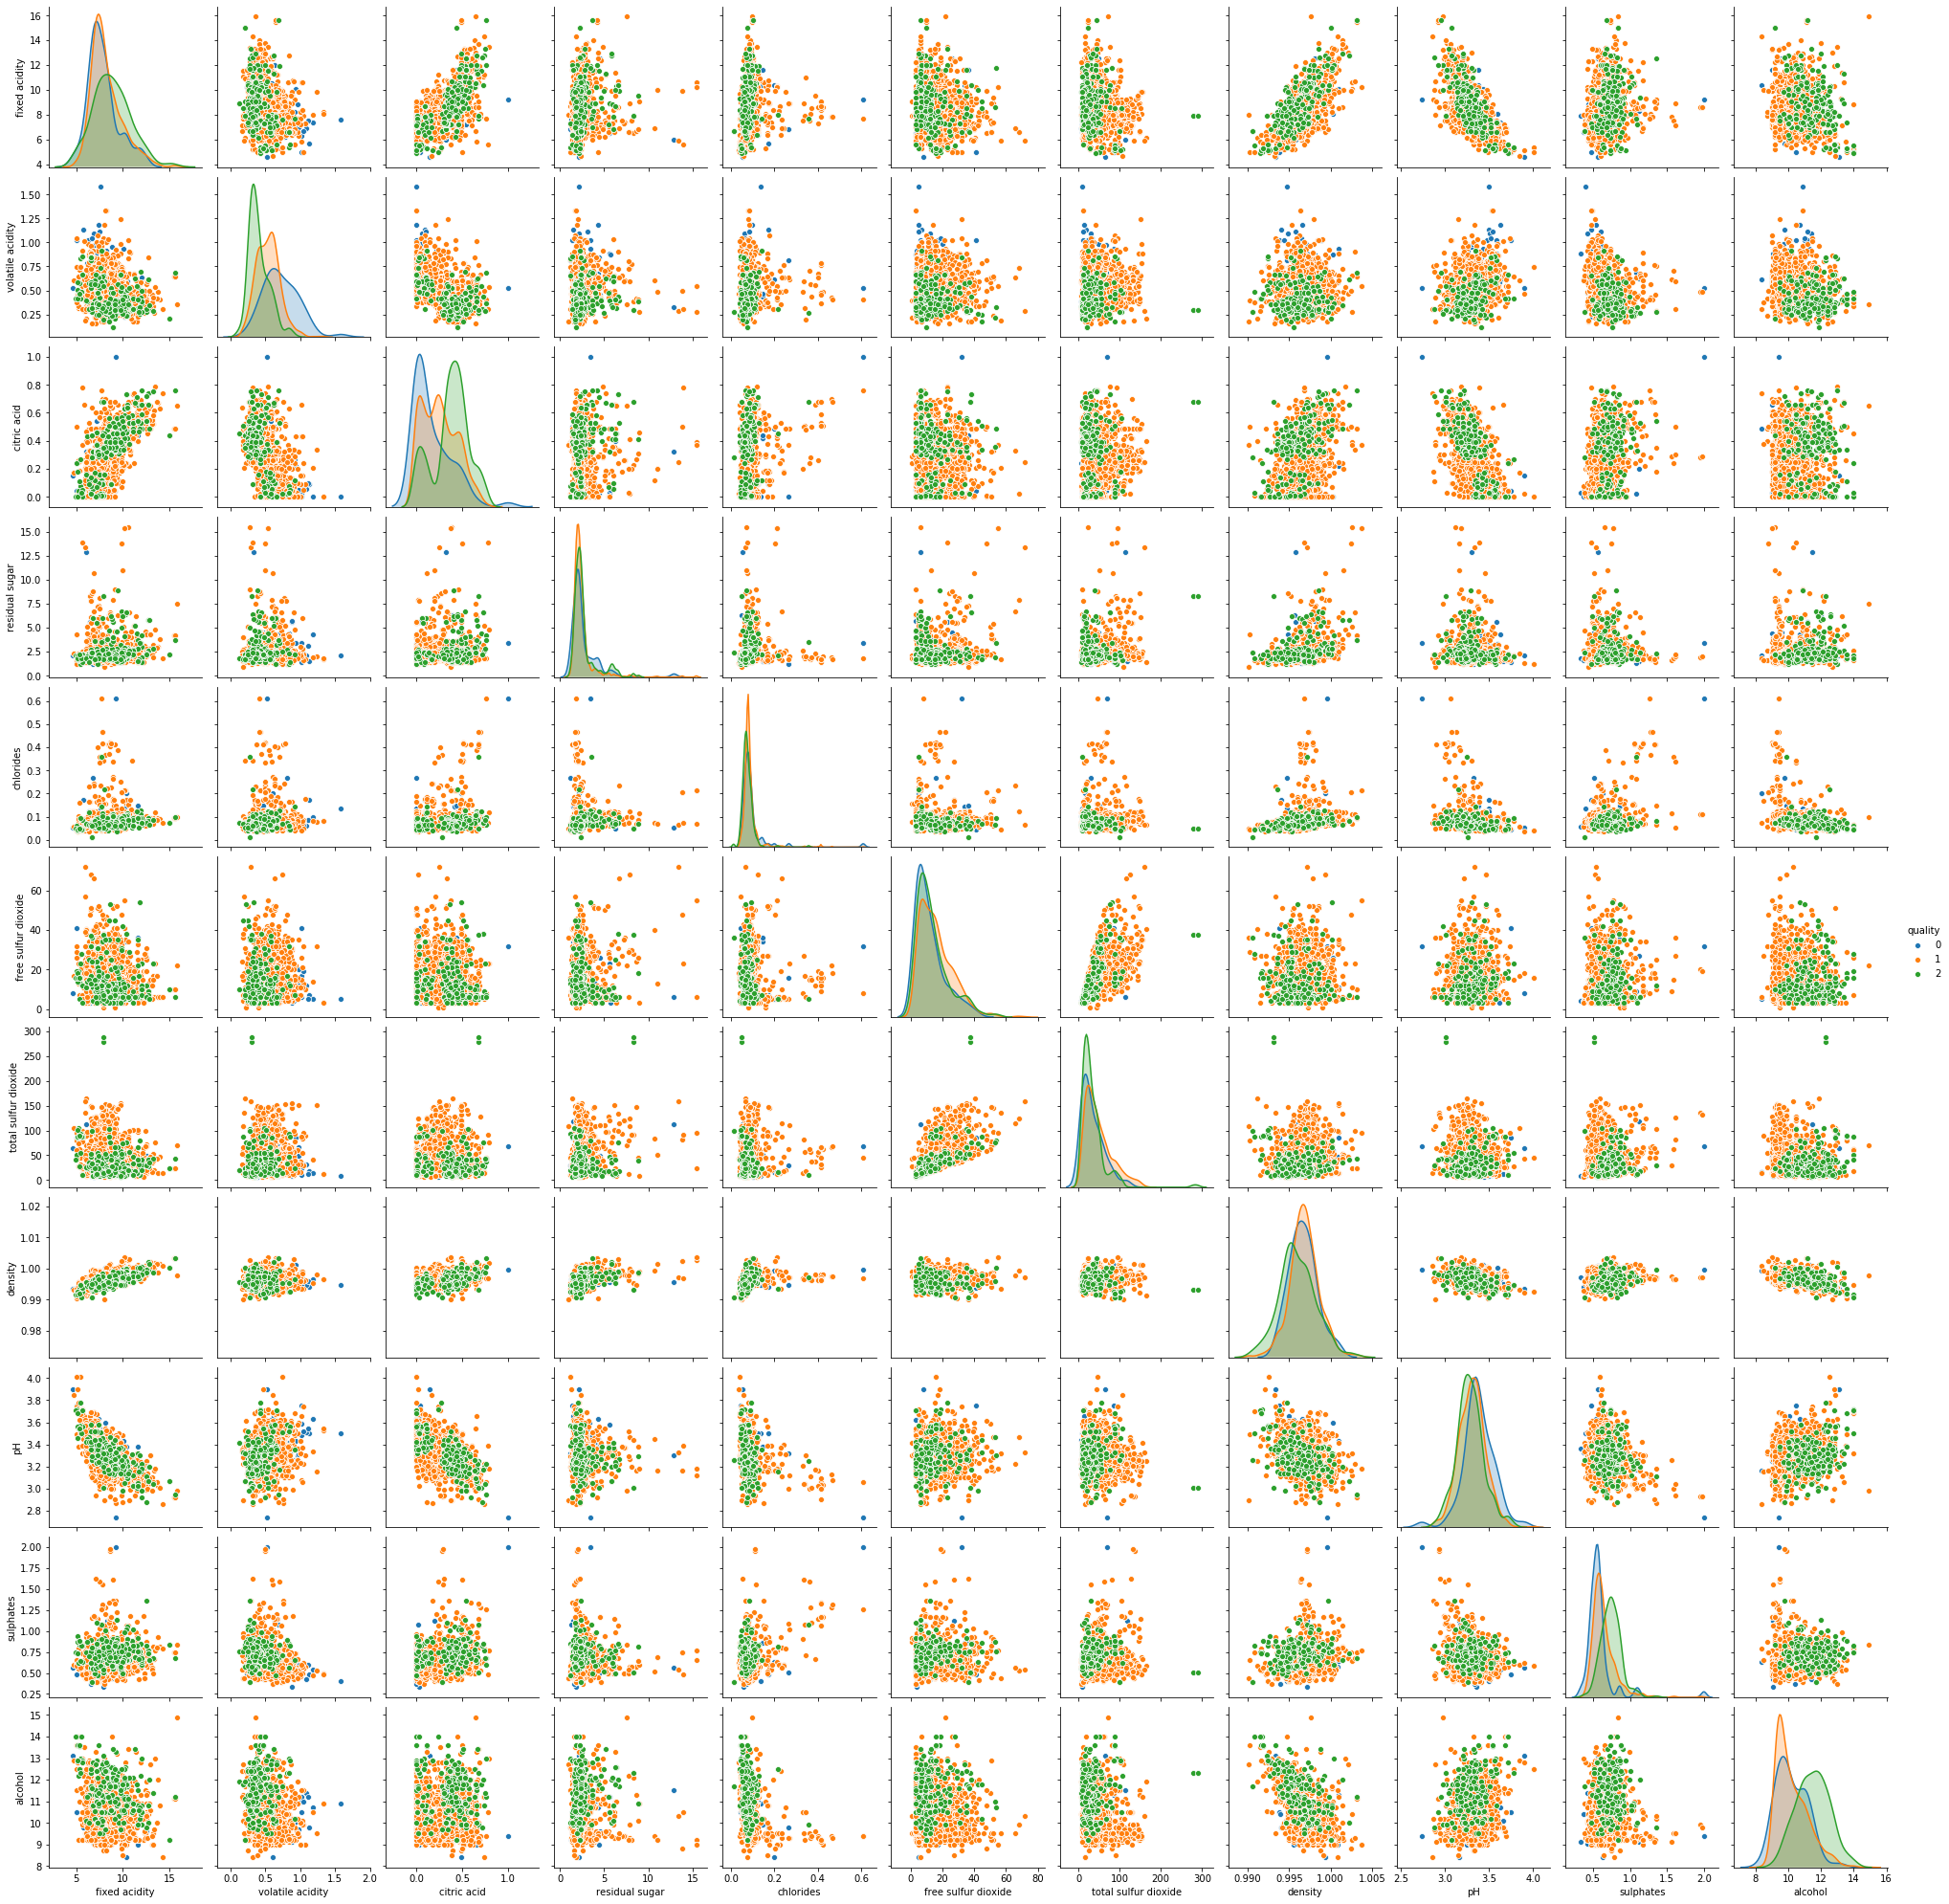

In [8]:
sns.pairplot(data=data, hue = 'quality')

- We can work with residual sugar and alcohol attributes

In [9]:
attributeA='residual sugar'
attributeB='alcohol'

- Lets look at how data is distributed:

Text(0.5, 1.0, 'Actual distribution')

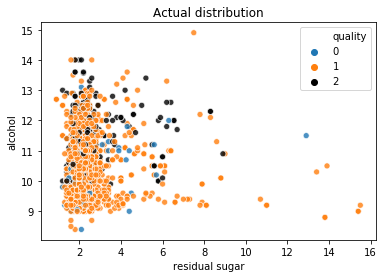

In [12]:
sns.scatterplot(data=data, x=attributeA, y=attributeB, hue="quality",alpha=0.8, palette=["C0", "C1", "k"]).set_title("Actual distribution")

## Step 5a: Applying E-M model to data
- here we are initializing with some random parameters

In [13]:
import random as rand
k1 = rand.randrange(len(data)) 
k2 = rand.randrange(len(data))
k3 = rand.randrange(len(data))
from scipy.stats import norm
import sys
shift= sys.maxsize
epsilon=0.01
iterations=1
initial_assumption = { 
'mu1': [df[attributeA].loc[k1], df[attributeB].loc[k1]],
'sigma1': [ [1, 0], [0, 1]],
'mu2': [df[attributeA].loc[k2],df[attributeB].loc[k2]],
'sigma2': [ [2, 0], [0, 1]],
'mu3': [df[attributeA].loc[k3],df[attributeB].loc[k3]],
'sigma3': [ [0.5, 0], [0, 1]],
'lambda': [0.3, 0.5, 0.2]
    }

df['predictions']=map(lambda x:x+1, np.random.choice (3,len(data)))

params = pd.DataFrame.from_dict(initial_assumption, orient = 'index')
params = params.transpose()


- here we repeat untill the values are converged

In [14]:
while shift > epsilon:
    iterations += 1
    new_class = expectation(df.copy(), params,attributeA, attributeB)
    new_params = maximization(new_class, params.copy(),attributeA,attributeB)
    shift = distance(params, new_params)
    df = new_class
    params = new_params


### Let us look at how data is distributed using E-M model:

Text(0.5, 1.0, 'estimated distributions')

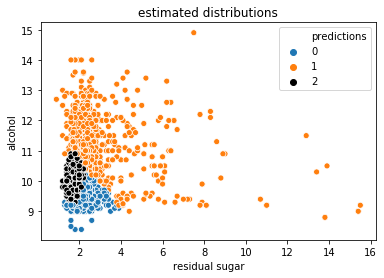

In [15]:
sns.scatterplot(data=df, x=attributeA, y=attributeB, hue="predictions", palette=["C0", "C1", "k"]).set_title("estimated distributions")

- data is well distributed we can see the boundaries clearly for the distributions from data, although it is not accurately distributed according quality of wine, in terms of the data provided it has done a good job forming distributions

## Step 3b: Import the second dataset
- now, let us import iris-species dataset

In [16]:
data= pd.read_csv('../data/Iris.csv')
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Step 4b: Prepare data for modelling
- Let us have a closer look at the dataset itself to prepare for  modelling

In [17]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- we have our target attribute `species` which is a categorical attribute let us now encode it
- hereby iris-setosa will be represented as 0, iris-versicolor will be represented as 1 and iris-virginica will be represented as 2  

In [18]:
attributeibutes = {'setosa':0, 'versicolor':1, 'virginica':2}
data['species'] = data['species'].map(attributeibutes)
df=data.copy()
data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
45,4.8,3.0,1.4,0.3,0
61,5.9,3.0,4.2,1.5,1
66,5.6,3.0,4.5,1.5,1
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2


- Let us look at how iris-data is distributed

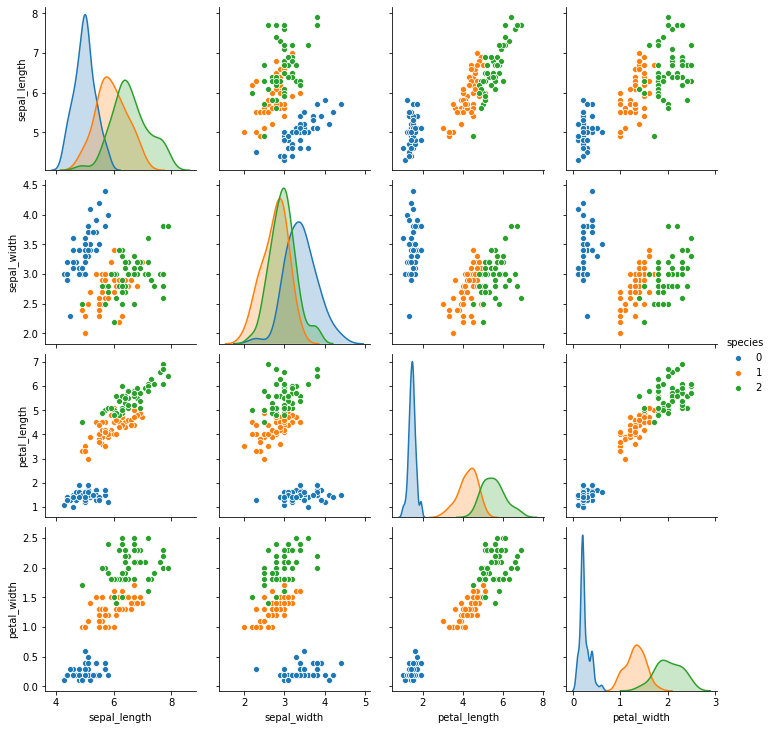

In [19]:
sns.pairplot(data=data, hue = 'species')

- we can work with `sepal_length` and `petal_length`

In [20]:
attributeA='sepal_length'
attributeB='petal_length'

- Lets look at how data is distributed:

Text(0.5, 1.0, 'Actual distribution')

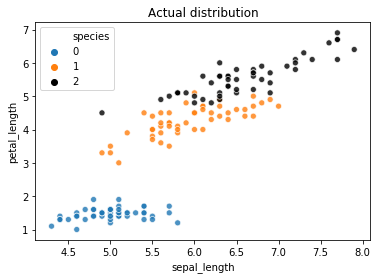

In [21]:
sns.scatterplot(data=data, x=attributeA, y=attributeB, hue="species",alpha=0.8, palette=["C0", "C1", "k"]).set_title("Actual distribution")

## Step 5b: Applying E-M model to data
- here we are initializing with some random parameters

In [22]:
import random as rand
k1 = rand.randrange(len(data)) 
k2 = rand.randrange(len(data))
k3 = rand.randrange(len(data))
from scipy.stats import norm
import sys
shift= sys.maxsize
epsilon=0.01
iterations=0
initial_assumption = { 
'mu1': [df[attributeA].loc[k1], df[attributeB].loc[k1]],
'sigma1': [ [1, 0], [0, 1]],
'mu2': [df[attributeA].loc[k2],df[attributeB].loc[k2]],
'sigma2': [ [2, 0], [0, 1]],
'mu3': [df[attributeA].loc[k3],df[attributeB].loc[k3]],
'sigma3': [ [0.5, 0], [0, 1]],
'lambda': [0.3, 0.5, 0.2]
    }

df['predictions']=map(lambda x:x+1, np.random.choice (3,len(data)))

params = pd.DataFrame.from_dict(initial_assumption, orient = 'index')
params = params.transpose()


- here we repeat until the values are converged

In [23]:
while shift > epsilon:
    iterations += 1
    new_class = expectation(df.copy(), params,attributeA, attributeB)
    new_params = maximization(new_class, params.copy(),attributeA,attributeB)
    shift = distance(params, new_params)
    df = new_class
    params = new_params

### Let us look at how data is distributed using E-M model:

Text(0.5, 1.0, 'estimated distributions')

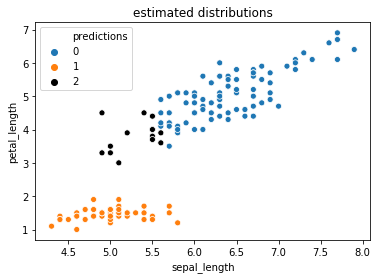

In [24]:
sns.scatterplot(data=df, x=attributeA, y=attributeB, hue="predictions", palette=["C0", "C1", "k"]).set_title("estimated distributions")

- for iris dataset, distribution are quite accurate and overall our model performed better on this data.

## Results:

- E-M model has formed distributions quite good but for iris data resukts were nmuch satisfying than that for wine quality data
- I observed that when the data is distributed and scattered well, then the distributions are much better.

## References:

- https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm#Gaussian_mixture
- https://www.youtube.com/watch?v=DIADjJXrgps
- https://www.youtube.com/watch?v=qy3WKmSXM64